### Importing The Libraries

In [6]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns

plt.style.use(style="seaborn")
%matplotlib inline

In [7]:
bajaj= pd.read_csv(r"C:\Users\Nikhilesh Badiwal\Desktop\projects\bajajdata.csv")

In [8]:
bajaj.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,20-09-2021,7360.000000,7581.000000,7320.75,7442.450195,7415.449707,1083806
1,21-09-2021,7481.149902,7847.100098,7401.00,7813.850098,7785.502441,1993133
2,22-09-2021,7850.000000,7895.000000,7771.00,7793.649902,7765.375488,1500541


In [9]:
bajaj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [5]:
bajaj=bajaj[["Date ","close "]]

KeyError: "None of [Index(['Date ', 'close '], dtype='object')] are in the [columns]"

In [104]:
list(bajaj.columns)

['Date ', 'close ']

In [105]:
bajaj.shape

(991, 2)

In [106]:
## for sake of simplicity in data there is one extraspace anfter each column name we will remname that.

In [107]:
bajaj=bajaj.rename(columns={"Date " :"Date","close ":"close"})

In [108]:
list(bajaj.columns)

['Date', 'close']

In [109]:
## we will select rows which are important and contribute in analysis and drop others

In [110]:
bajaj.tail(3)

,Date,close
988,03-Jan-18,"1,715.30"
989,02-Jan-18,"1,724.65"
990,01-Jan-18,"1,725.65"


In [111]:
## for time series analysis we will see trend date and close price

In [112]:
## converting Date in date time format
bajaj['Date'] = pd.to_datetime(bajaj['Date'])

In [113]:
## sorting the data by its date 
bajaj=bajaj.sort_values(by='Date')
## seting index as date
bajaj=bajaj.set_index('Date',drop=True)

In [114]:
bajaj["close"]

Date
2018-01-01    1,725.65
2018-01-02    1,724.65
2018-01-03    1,715.30
2018-01-04    1,754.00
2018-01-05    1,814.50
                ...   
2021-12-27    6,890.75
2021-12-28    6,906.65
2021-12-29    6,911.65
2021-12-30    6,871.10
2021-12-31    6,977.30
Name: close, Length: 991, dtype: object

In [115]:
bajaj["close"]=bajaj["close"].str.replace(",","")
bajaj["close"]=pd.to_numeric(bajaj["close"])

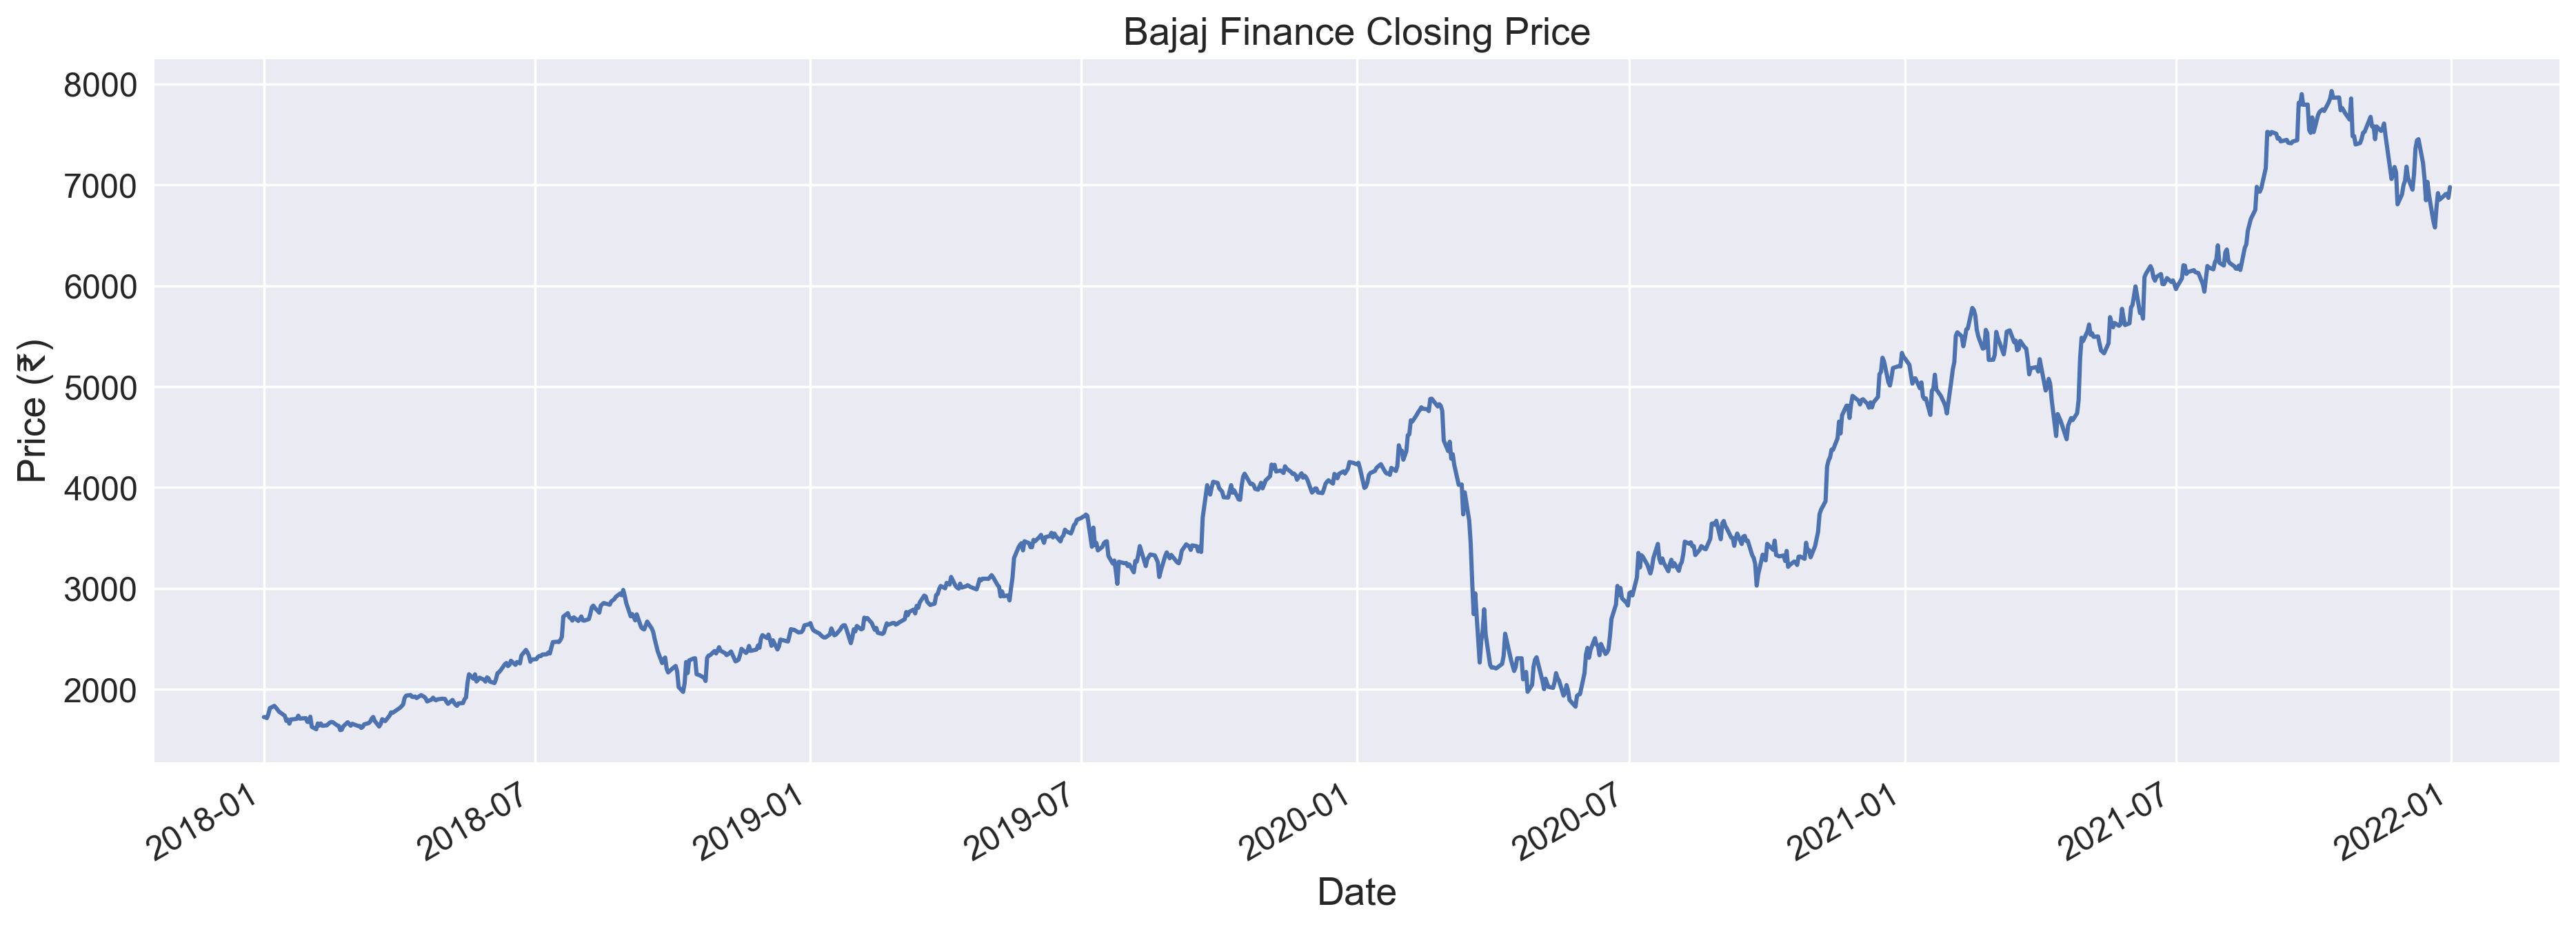

<Figure size 432x288 with 0 Axes>

In [116]:
plt.figure(figsize=(18,6), dpi=250)
bajaj["close"].plot(fontsize=14)
plt.title("Bajaj Finance Closing Price",fontsize=16)
plt.ylabel("Price (₹)",fontsize=16)
plt.xlabel("Date",fontsize=16)
plt.show()
plt.savefig('Bajaj Closing Price Total .png',dpi=250, bbox_inches='tight')
plt.show()

In [117]:
df_18=bajaj.close[:246]
df_19=bajaj.close[247:491]
df_20=bajaj.close[492:743]
df_21=bajaj.close[743:]


In [118]:
df_21.tail(3)

Date
2021-12-29    6911.65
2021-12-30    6871.10
2021-12-31    6977.30
Name: close, dtype: float64

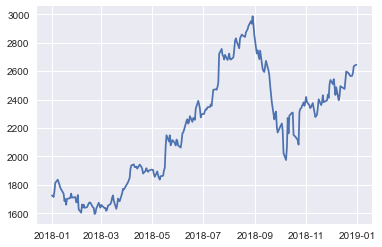

In [119]:
plt.plot(df_18)

<Figure size 432x288 with 0 Axes>

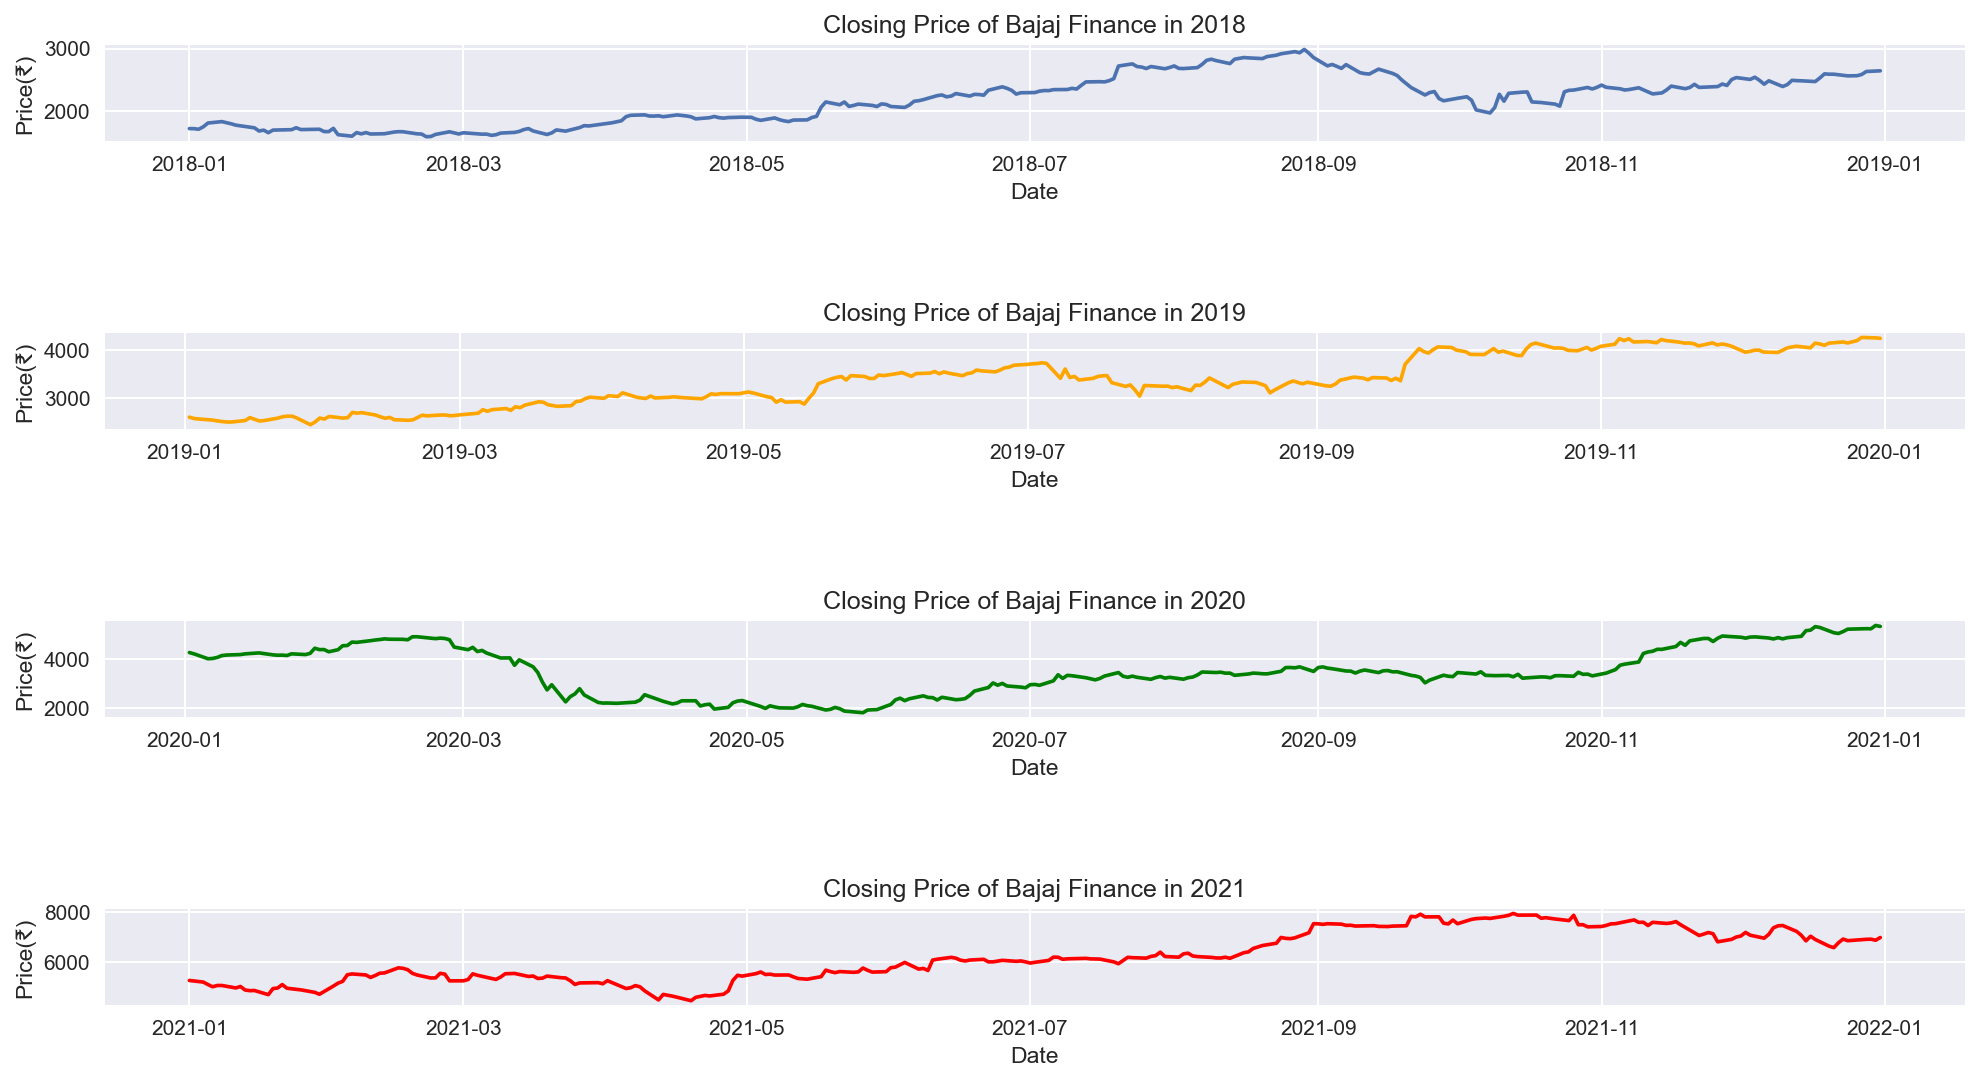

<Figure size 432x288 with 0 Axes>

In [120]:
fig = plt.figure()
# fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.9, right=.9)
plt.figure(figsize=(16,8), dpi=150)

plt.subplot(4, 1, 1)
plt.plot(df_18)
plt.title("Closing Price of Bajaj Finance in 2018",fontsize=12)
plt.xlabel("Date")
plt.ylabel("Price(₹)")
#

plt.subplot(4, 1, 2)
plt.plot(df_19, color='orange')
plt.title("Closing Price of Bajaj Finance in 2019")
plt.xlabel("Date")
plt.ylabel("Price(₹)")
#

plt.subplot(4, 1, 3)
plt.plot(df_20,color='green')
plt.title("Closing Price of Bajaj Finance in 2020")
plt.xlabel("Date")
plt.ylabel("Price(₹)")
#

plt.subplot(4, 1, 4)
plt.plot(df_21,color="red")
plt.title("Closing Price of Bajaj Finance in 2021")
plt.xlabel("Date")
plt.ylabel("Price(₹)")


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=2)
plt.show()
plt.savefig('Bajaj Closing Price Year Wise.png')

<Figure size 432x288 with 0 Axes>

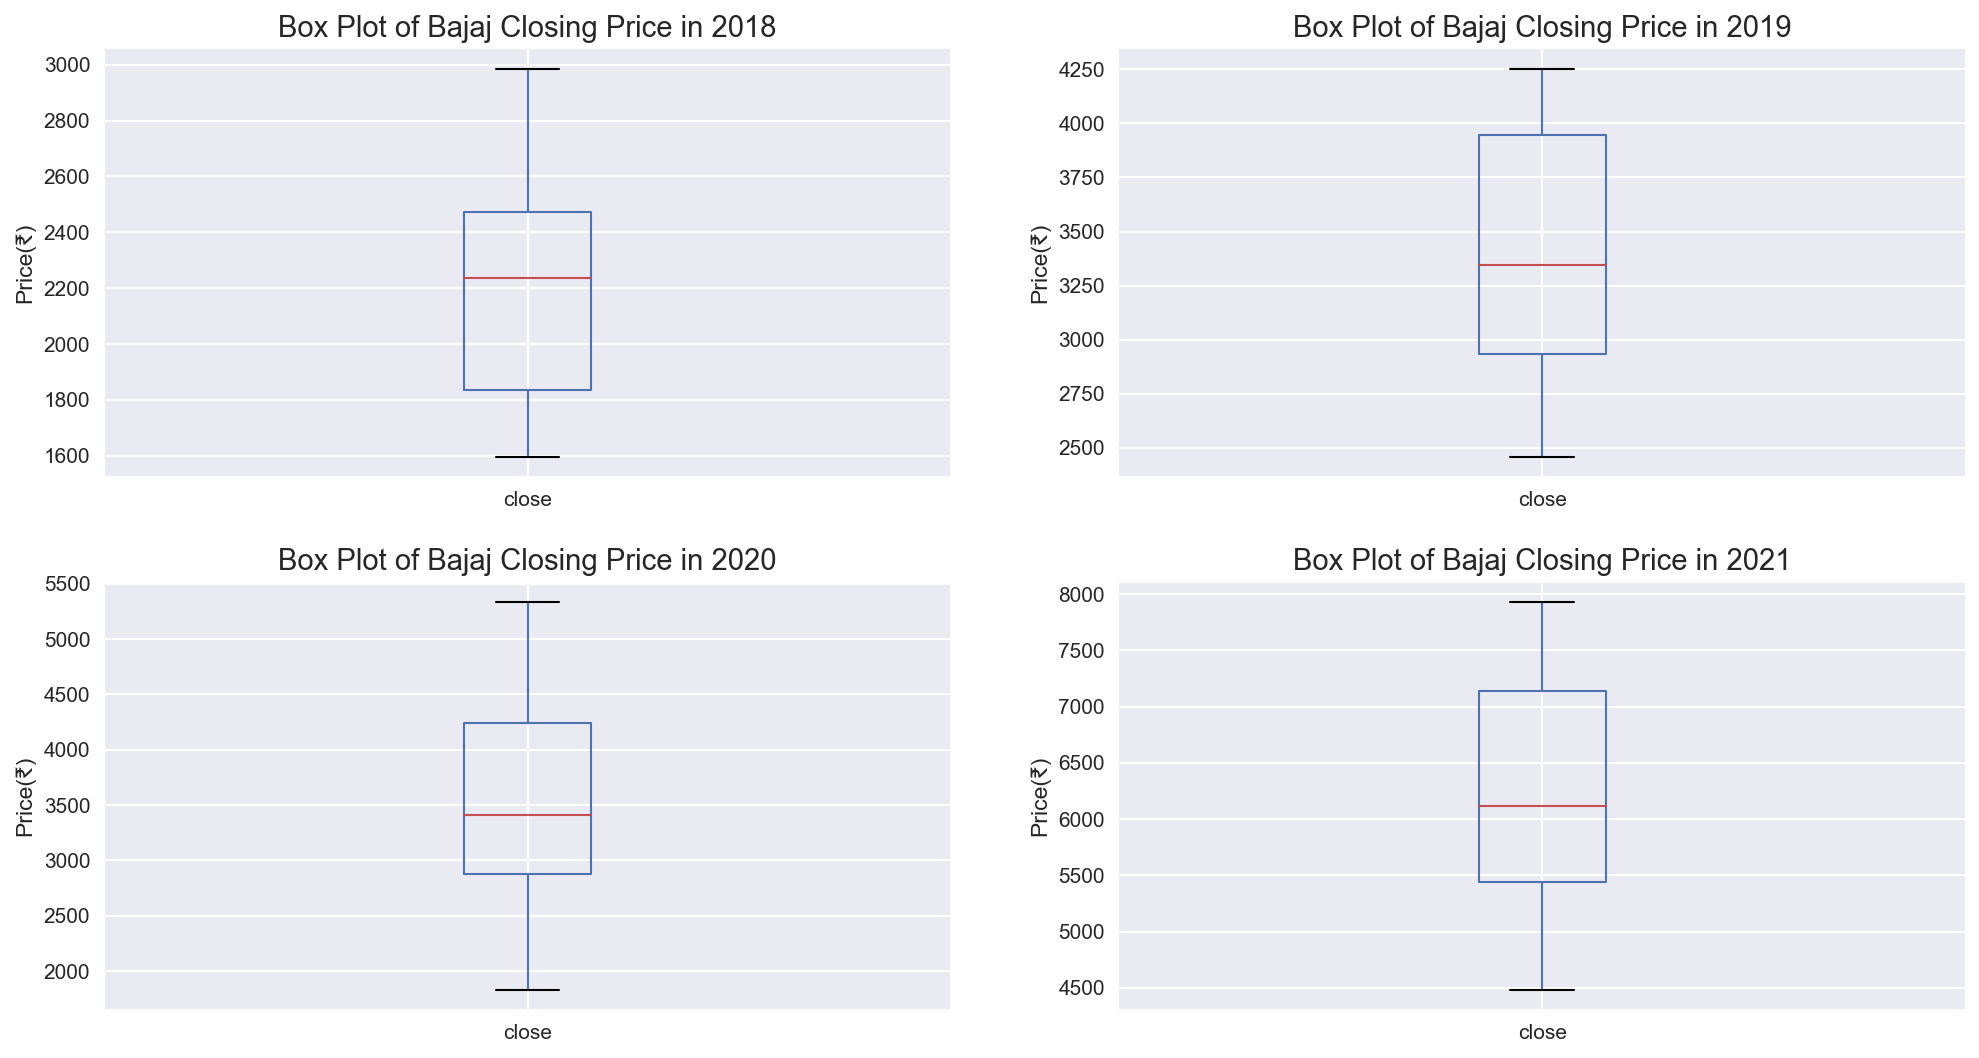

<Figure size 432x288 with 0 Axes>

In [121]:
fig = plt.figure()
# fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.9, right=.9)
plt.figure(figsize=(16,8), dpi=150)

plt.subplot(2, 2, 1)
df_18.plot.box()
plt.title("Box Plot of Bajaj Closing Price in 2018",fontsize=14)
plt.ylabel("Price(₹)")
#

plt.subplot(2, 2, 2)
df_19.plot.box()
plt.title("Box Plot of Bajaj Closing Price in 2019",fontsize=14)
plt.ylabel("Price(₹)")
#

plt.subplot(2, 2, 3)
df_20.plot.box()
plt.title("Box Plot of Bajaj Closing Price in 2020",fontsize=14)
plt.ylabel("Price(₹)")
#

plt.subplot(2, 2,4)
df_21.plot.box()
plt.title("Box Plot of Bajaj Closing Price in 2021",fontsize=14)
plt.ylabel("Price(₹)")


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.25)
plt.show()
plt.savefig('Bajaj Box Plot.png')

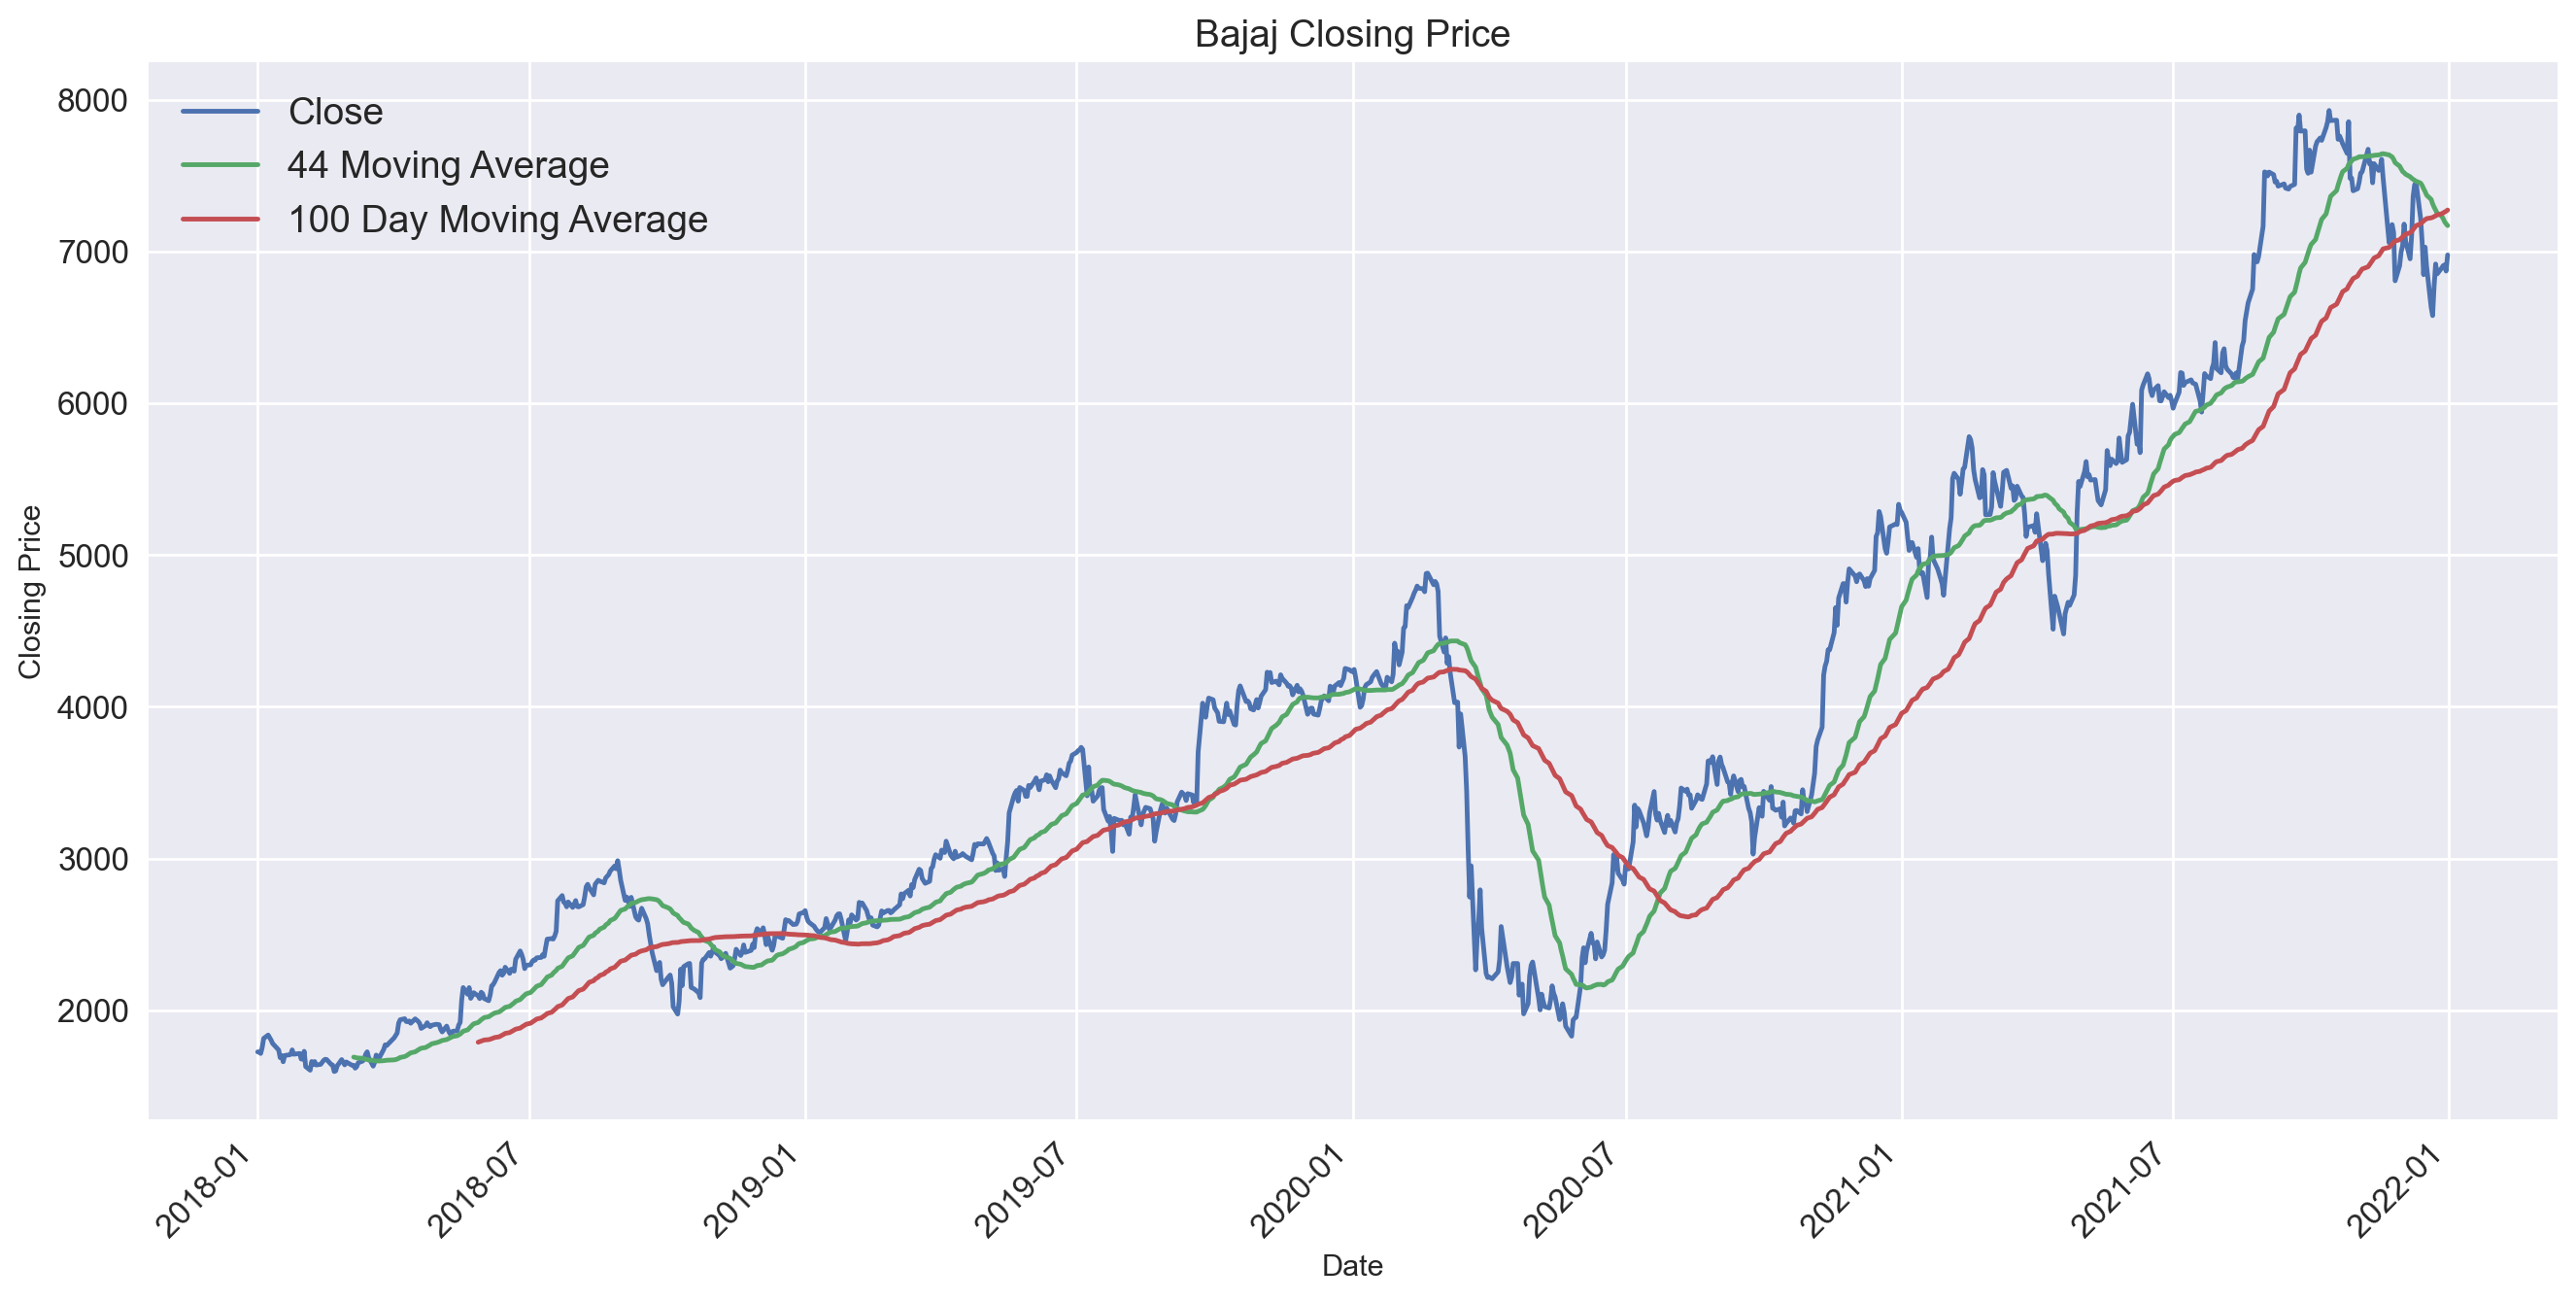

<Figure size 432x288 with 0 Axes>

In [122]:
plt.figure(figsize=(16,8), dpi=200)
bajaj["close"].plot(fontsize=12)
bajaj["close"].rolling(window=44).mean().plot()
bajaj["close"].rolling(window=100).mean().plot()
plt.legend(("Close","44 Moving Average","100 Day Moving Average"),loc = 'upper left',fontsize=14)

plt.xticks(rotation=45)
plt.title("Bajaj Closing Price",fontsize=14)
plt.ylabel("Closing Price")
plt.xlabel("Date")
plt.savefig("Tata_Steel")
plt.show()
plt.savefig('Bajaj Closing Price 44 days & 100 days MA .png',dpi=500)

#### data frame in univeriante

In [123]:
df1=bajaj["close"]

In [124]:
n=int(len(df1)*0.85)
df=df1[:n]
test=df1[n:]

In [125]:
df_18.describe()

count     246.000000
mean     2183.707520
std       383.401099
min      1596.450000
25%      1836.987500
50%      2237.675000
75%      2473.875000
max      2985.500000
Name: close, dtype: float64

In [126]:
df_19.describe()

count     244.000000
mean     3359.500410
std       534.681387
min      2458.500000
25%      2933.725000
50%      3347.475000
75%      3945.862500
max      4252.650000
Name: close, dtype: float64

In [127]:
df_20.describe()

count     251.000000
mean     3501.565737
std       933.674948
min      1829.000000
25%      2880.725000
50%      3409.950000
75%      4238.900000
max      5334.150000
Name: close, dtype: float64

In [128]:
df_21.describe()

count     248.000000
mean     6231.373790
std       977.190663
min      4479.600000
25%      5443.437500
50%      6116.900000
75%      7135.725000
max      7929.300000
Name: close, dtype: float64

### Checking stationary by Agumented Dickey -fuller test
#### Null Hypothesis: series is non stationary and Alternativve : it is stationary

In [129]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.dropna())
print(f"ADF Statistic : {result[0]}")
print(f"p-value : {result[1]}")


ADF Statistic : -1.2100960316878975
p-value : 0.6692376447894408


###  p value is higher than significance level we are fail to reject null hypothesis
### which implies data is non- stationary

###  Non Stationary 

In [130]:
from statsmodels.graphics.tsaplots import plot_acf

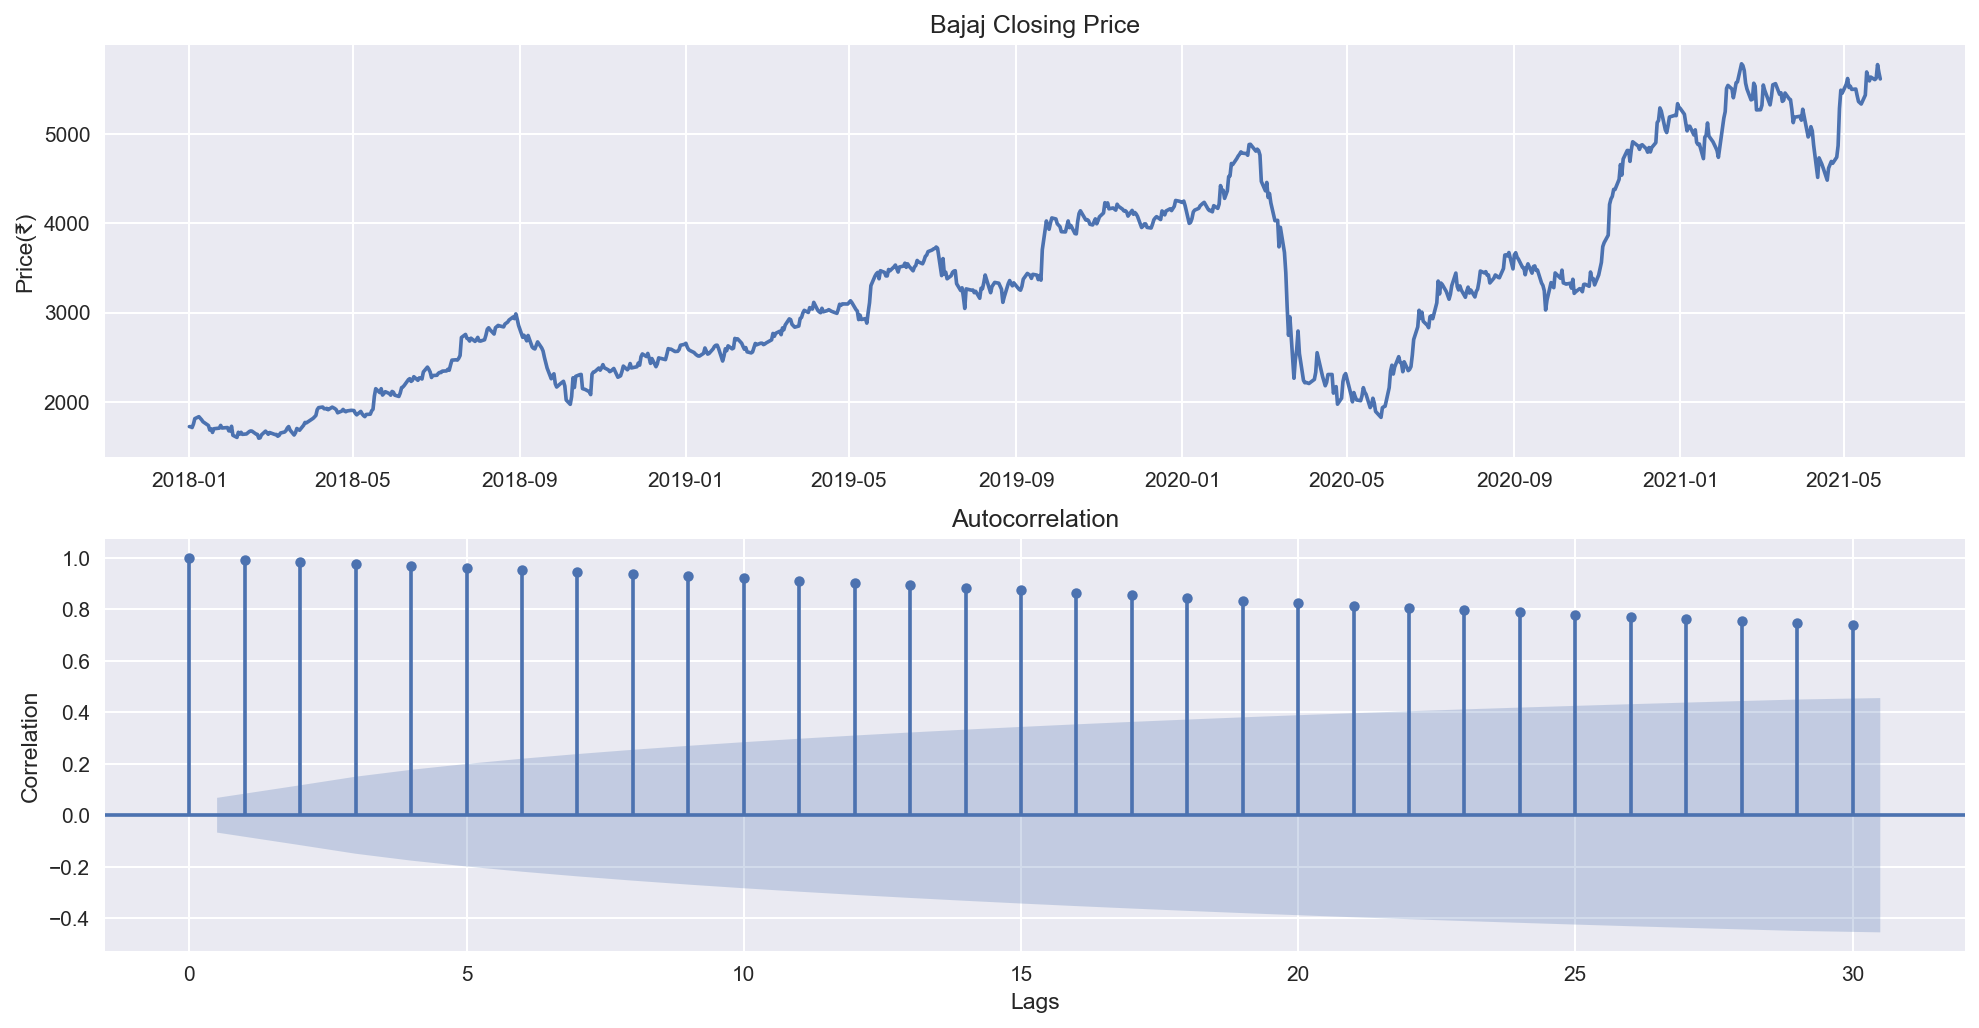

In [131]:
fig, (ax1,ax2)= plt.subplots(2, figsize=(16,8),dpi=150)
ax1.plot(df)
ax1.set_title(("Bajaj Closing Price"))
plt.title("Bajaj Closing Price")
plt.ylabel("Correlation")
plt.xlabel("Lags")
plot_acf(df,ax=ax2,)

ax1.set_ylabel('Price(₹)');
plt.savefig('Bajaj Time Series and ACF without Differencing .jpg')

####  Takining first differencing 

####  After first diffrence we can see there is no trend and it is starinary

In [132]:
diff=df.diff().dropna()
from statsmodels.tsa.stattools import adfuller
result=adfuller(diff.dropna())
print(f"ADF Statistic : {result[0]}")
print(f"p-value : {result[1]}")

ADF Statistic : -7.786031101708636
p-value : 8.175441415963228e-12


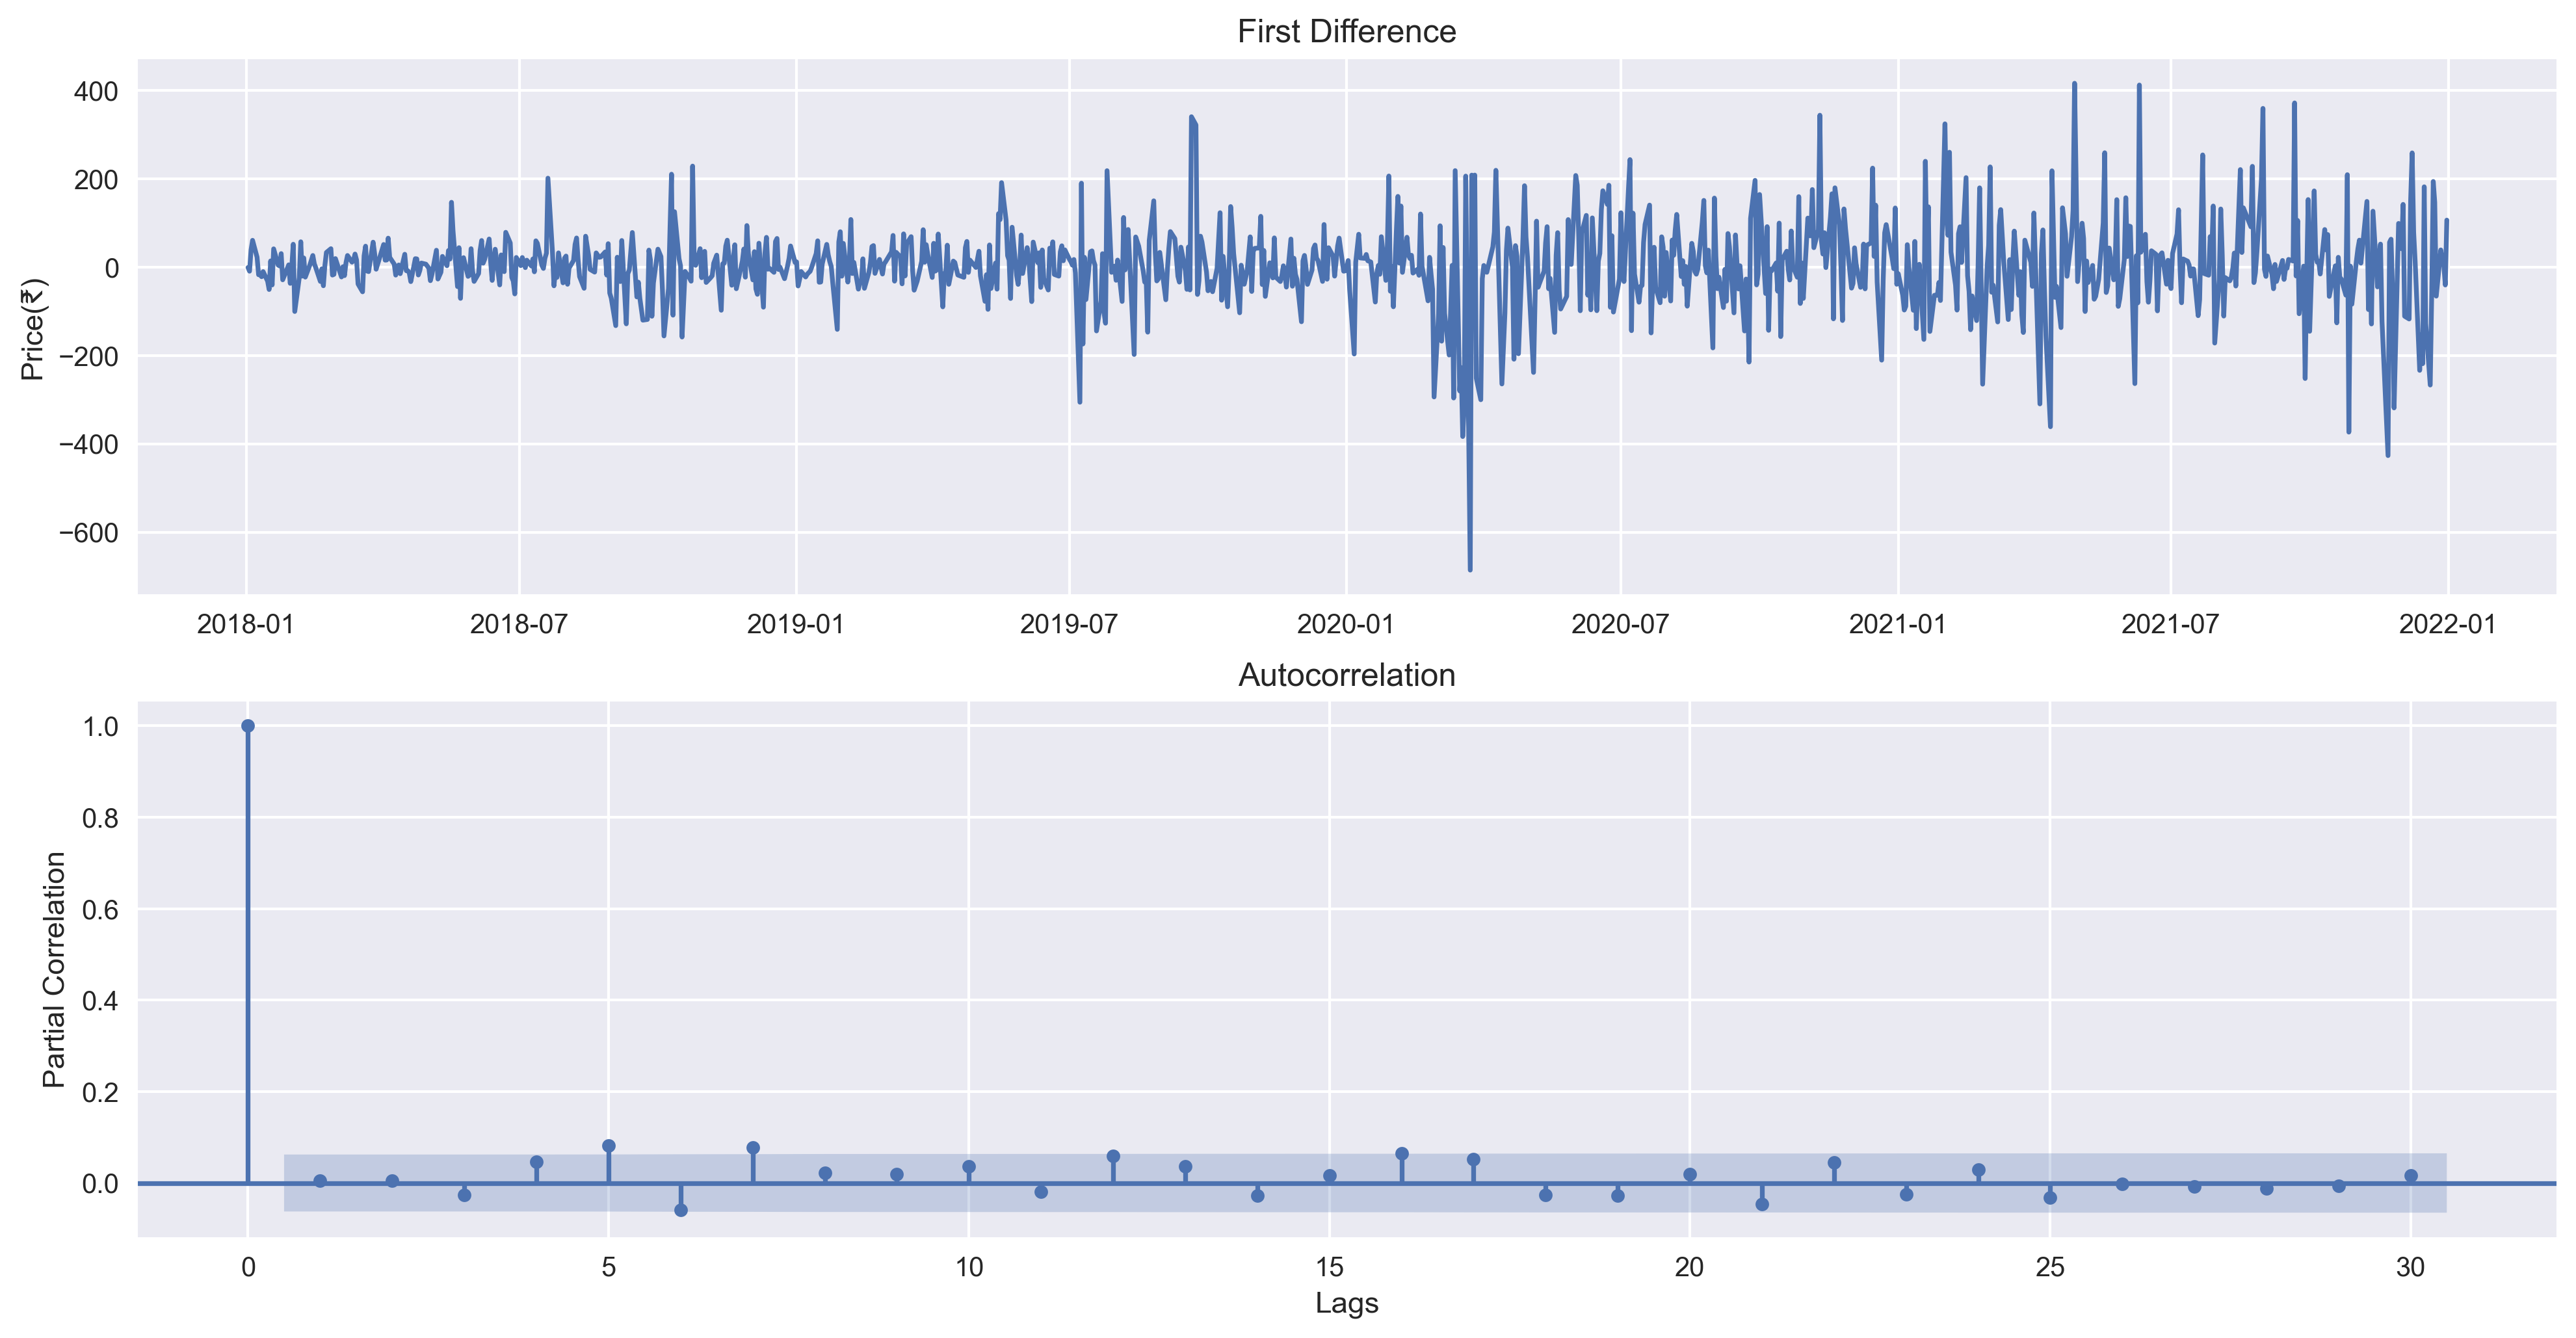

In [252]:
diff=df.diff().dropna()
fig, (ax1,ax2)= plt.subplots(2, figsize=(16,8),dpi=300)
ax1.plot(diff)
ax2.set_title(("Partial Auto Correlation"))
ax1.set_title(("First Difference"))
ax1.set_ylabel('Price(₹)');
plot_acf(diff,ax=ax2)
plt.xlabel("Lags")
plt.ylabel("Partial Correlation");
plt.savefig('Bajaj Closing Price and ACF after first difference .png')

In [213]:
diff.describe()

count    990.000000
mean       5.304697
std       95.619143
min     -685.750000
25%      -33.950000
50%        4.250000
75%       45.637500
max      415.850000
Name: close, dtype: float64

### stoping criteria likhna h
####  Autocorrelation goes far negative we choose I as 1

###  we can use the pmdarima package to get the number of differencing 

In [134]:
from pmdarima.arima.utils import ndiffs

In [135]:
ndiffs(df,test="adf")

1

In [136]:
from statsmodels.graphics.tsaplots import plot_pacf

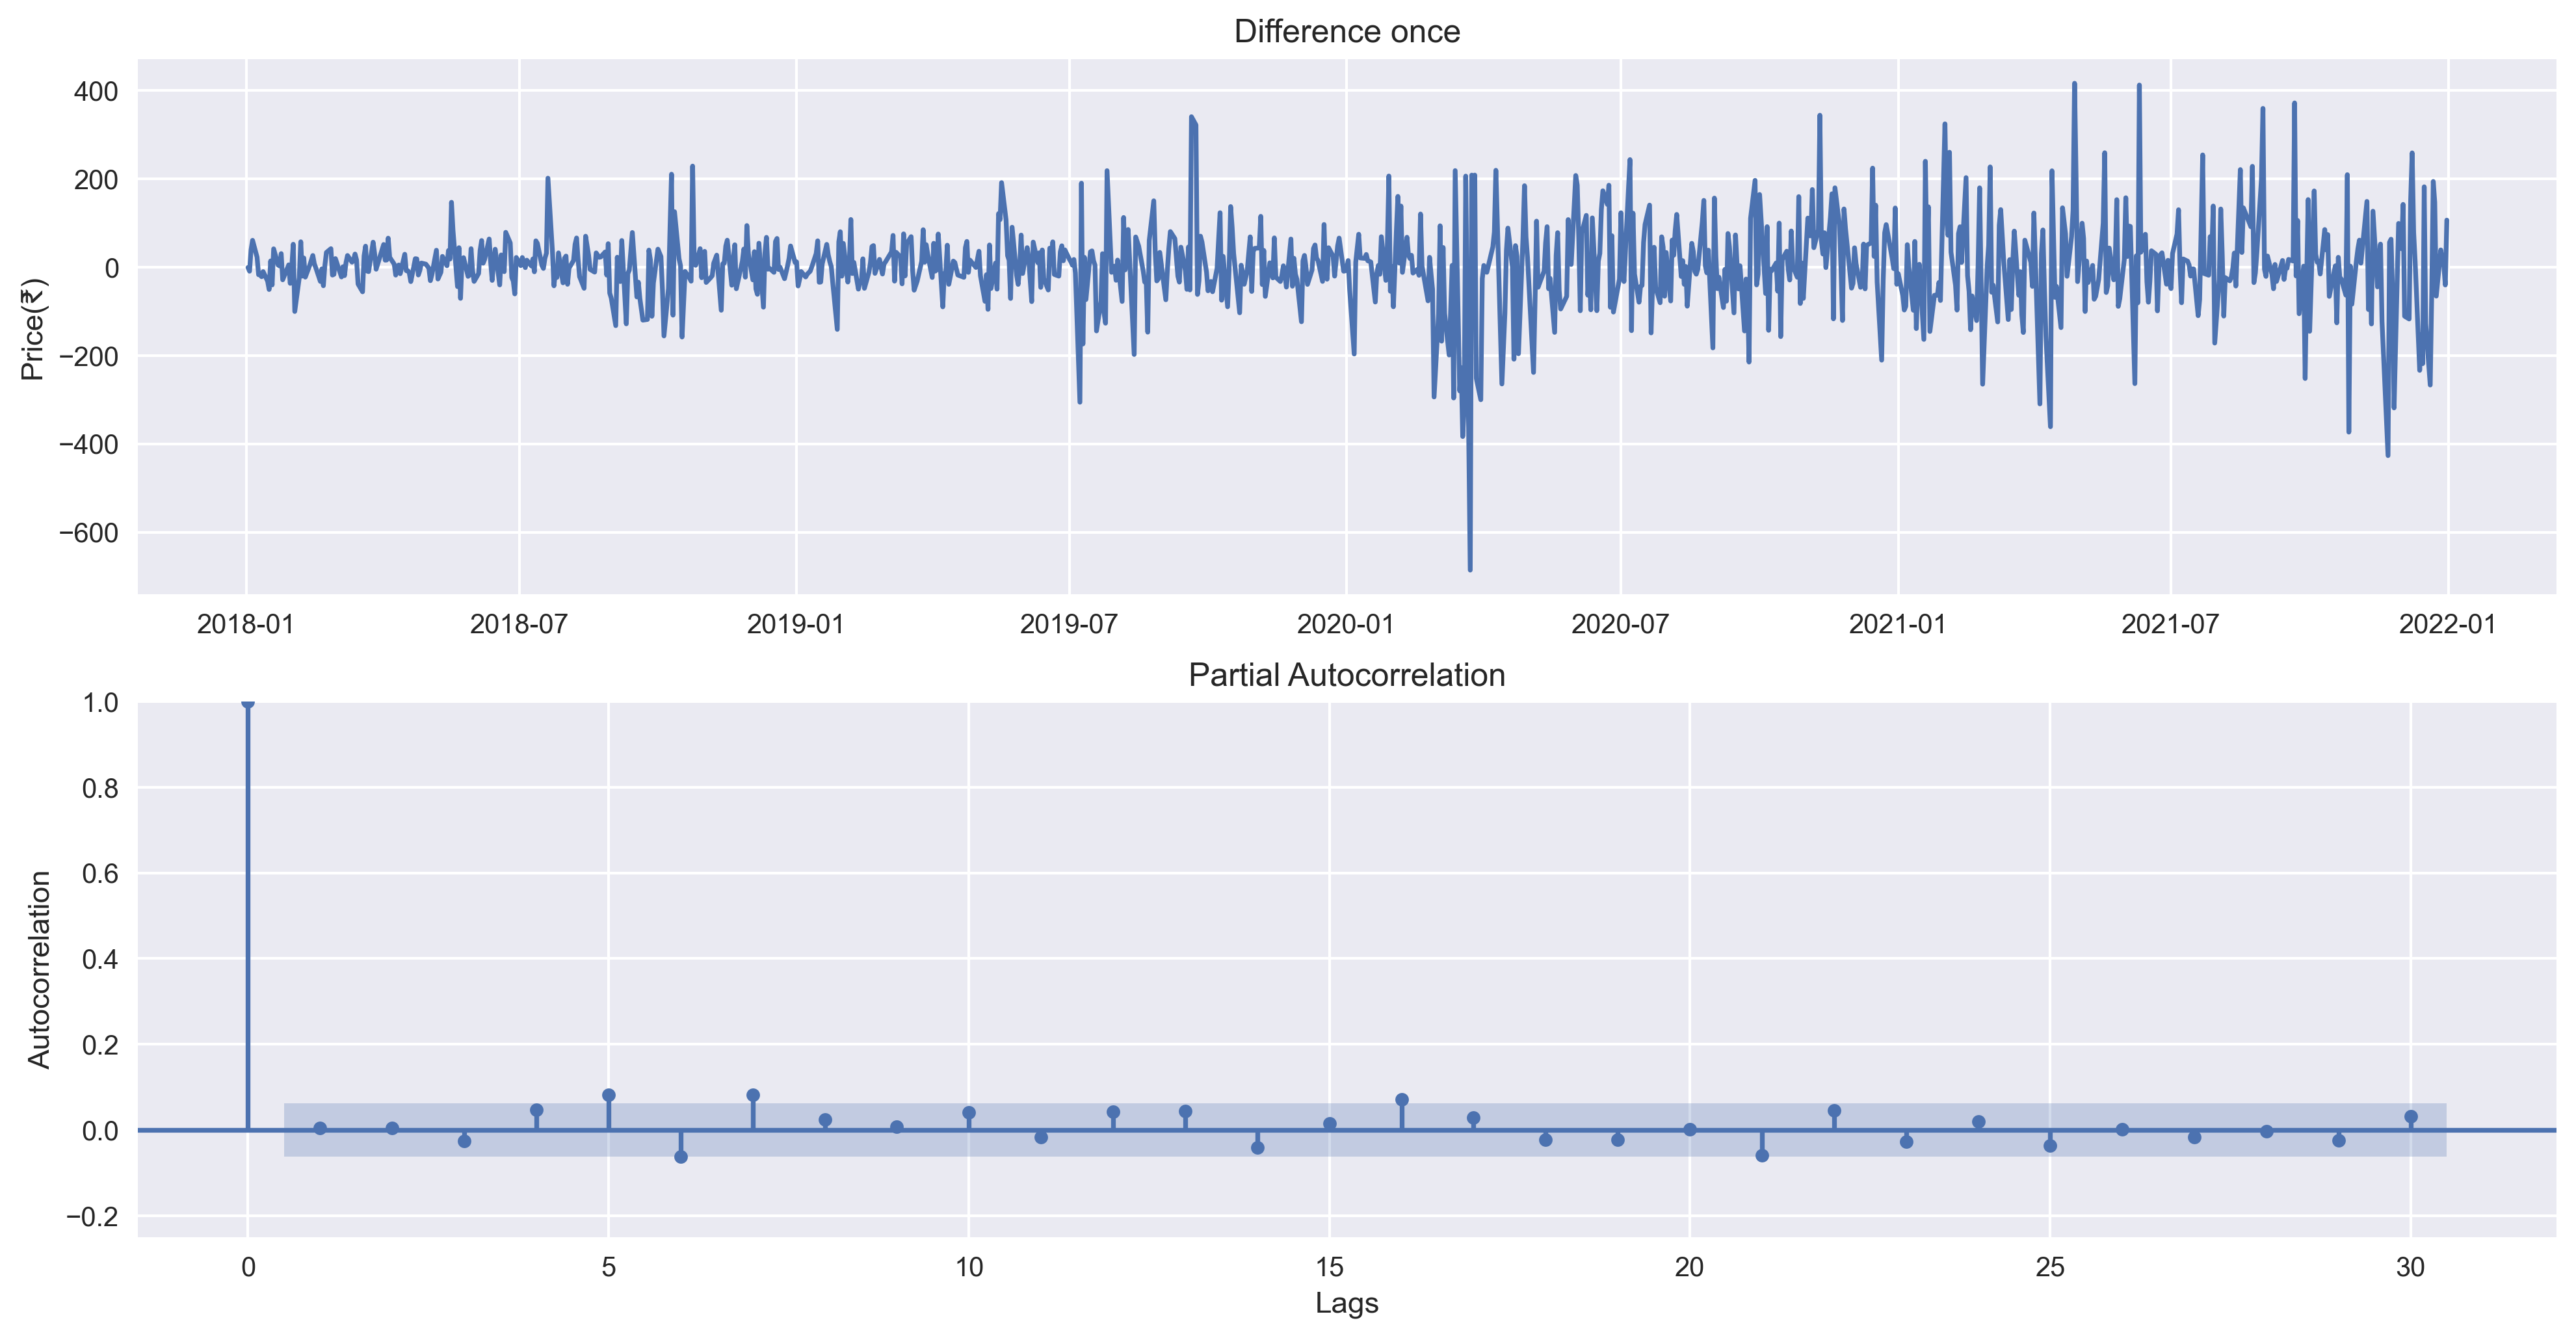

In [254]:
# Patial AutoCorrelation 

diff=df.diff().dropna()
fig, (ax1,ax2)= plt.subplots(2, figsize=(16,8),dpi=300)

ax1.plot(diff)
ax1.set_title(("Difference once"))
ax2.set_ylim(-0.25,1)

plot_pacf(diff,ax=ax2)
ax1.set_ylabel('Price(₹)')
plt.xlabel("Lags")
plt.ylabel("Autocorrelation");
plt.savefig('Bajaj Closing Price and PACF after first difference .png')

In [138]:
#q can be 5,6,7,12
# I is 1 
# p can be 5,6,7,13,21

###  Fitting the arima model

In [73]:
from statsmodels.tsa.arima_model import ARIMA

####  ARIMA (1,1,1)

In [139]:
#model=ARIMA(df,order=(1,1,1))
#result=model.fit(disp=0)
#import warnings
#warnings.filterwarnings('ignore')
#print(result.summary())

In [140]:
#model=ARIMA(df,order=(1,1,2))
#result=model.fit(disp=0)
#print(result.summary())

In [ ]:
#model=ARIMA(df,order=(2,1,1))
#result=model.fit(disp=0)
#print(result.summary())

In [257]:
# model=ARIMA(df,order=(2,1,2))
# result=model.fit(disp=0)
# print(result.summary())

In [141]:
#model=ARIMA(df,order=(3,1,1))
#result=model.fit(disp=0)
#print(result.summary())

In [ ]:
#model=ARIMA(df,order=(5,1,12))
#result=model.fit(disp=0)
#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
#model=ARIMA(df,order=(6,1,12))
#result=model.fit(disp=0)
#print(result.summary())0

In [142]:
#model=ARIMA(df,order=(5,1,5))
#result=model.fit(disp=0)
#import warnings
#warnings.filterwarnings('ignore')
#
#print(result.summary())

In [143]:
#model=ARIMA(df,order=(7,1,12))
#result=model.fit(disp=0)
#print(result.summary())

In [ ]:
#model=ARIMA(df,order=(13,1,12))
#result=model.fit(disp=0)
#print(result.summary())

In [144]:
#model=ARIMA(df,order=(6,1,6))
#result=model.fit(disp=0)
#print(result.summary())

In [ ]:
#model=ARIMA(df,order=(6,1,7))
#result=model.fit(disp=0)
#print(result.summary())

In [145]:
#model=ARIMA(df,order=(5,1,6))
#result=model.fit(disp=0)
#print(result.summary())

In [146]:
#model=ARIMA(df,order=(5,1,7))
#result=model.fit(disp=0)
#print(result.summary())

In [ ]:
#model=ARIMA(df,order=(5,1,13))
#result=model.fit(disp=0)
#print(result.summary())

In [147]:
#model=ARIMA(df,order=(5,1,11))
#result=model.fit(disp=0)
#print(result.summary())

In [ ]:
#model=ARIMA(df,order=(5,1,10))
#result=model.fit(disp=0)
#print(result.summary())

In [258]:
# model=ARIMA(df,order=(4,1,4))
# result=model.fit(disp=0)
# print(result.summary())

In [148]:
model=ARIMA(df,order=(5,1,12))
result=model.fit(disp=0)
import warnings
warnings.filterwarnings('ignore')


In [149]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  841
Model:                ARIMA(5, 1, 12)   Log Likelihood               -4947.913
Method:                       css-mle   S.D. of innovations             86.552
Date:                Sat, 18 Jun 2022   AIC                           9933.827
Time:                        21:31:08   BIC                          10023.784
Sample:                             1   HQIC                          9968.302
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.6629      3.761      1.240      0.215      -2.709      12.035
ar.L1.D.close      0.7517      0.031     24.136      0.000       0.691       0.813
ar.L2.D.close      0.0824      0.041

####  We will select ARIMA(5,1,12) with lowest AIC =(9933.83)

Text(0, 0.5, 'Frequency')

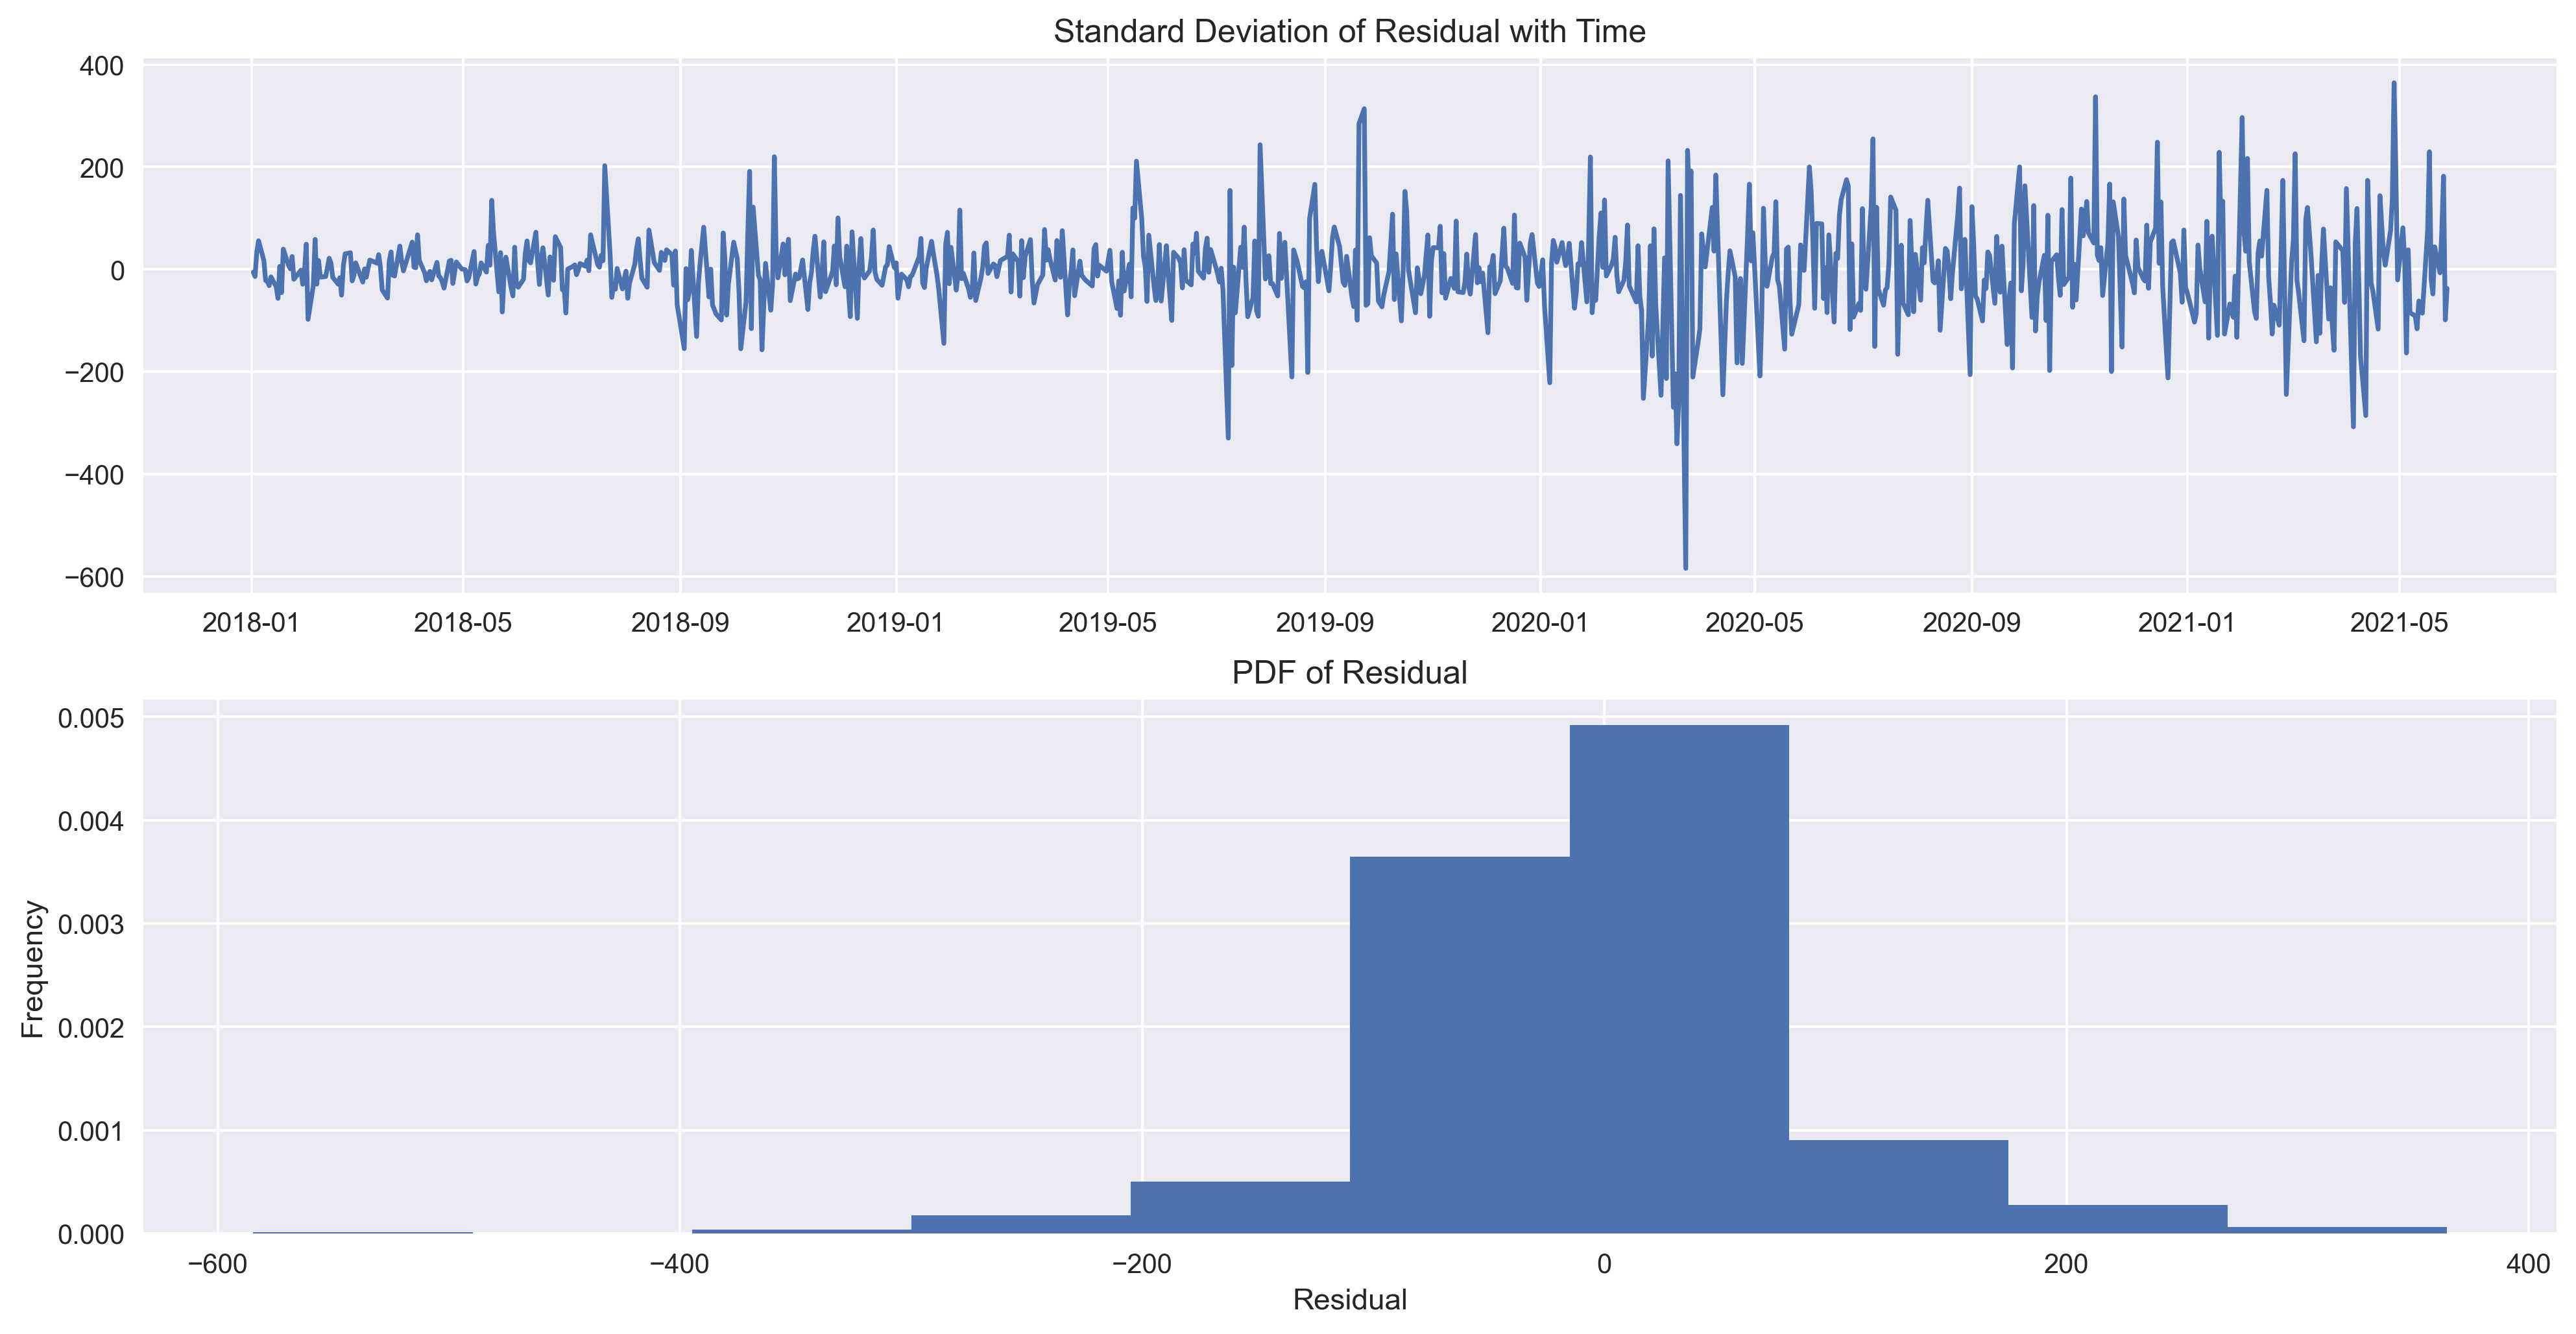

In [220]:
#plot residual
residuals=pd.DataFrame(result.resid)
fig, (ax1,ax2)=plt.subplots(2,figsize=(16,8),dpi=300)
ax1.plot(residuals)
ax2.hist(residuals,density=True)
ax2.set_title("PDF of Residual")
ax1.set_title("Standard Deviation of Residual with Time")
plt.xlabel("Residual")
plt.ylabel("Frequency")

In [245]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,0.268787,1.0


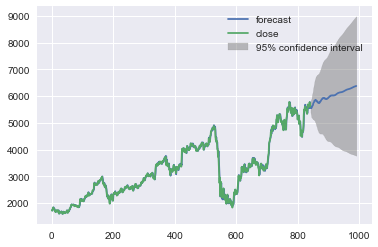

In [221]:
l_train=(len(df))
step=(len(test))
result.plot_predict(
    start=1,
    end=l_train,
    dynamic=False
    
);

In [222]:
l_train=(len(df))
step=(len(test))

In [223]:
#actual vs fitted
y_hat=result.predict(
    start=1,
    end=l_train,
    dynamic=False
);

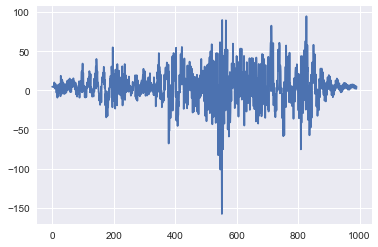

In [224]:
plt.plot(y_hat)

In [225]:
fc,se,conf=result.forecast(step)

In [226]:
fc=pd.Series(fc,index=test[:step].index)
lower=pd.Series(conf[:,0],index=test[:].index)
upper=pd.Series(conf[:,1],index=test[:].index)

In [227]:
fc

Date
2021-05-31    5563.443946
2021-06-01    5583.402122
2021-06-02    5584.156102
2021-06-03    5549.127213
2021-06-04    5575.731795
                 ...     
2021-12-27    6356.982699
2021-12-28    6361.595856
2021-12-29    6367.273383
2021-12-30    6370.914494
2021-12-31    6372.840011
Length: 149, dtype: float64

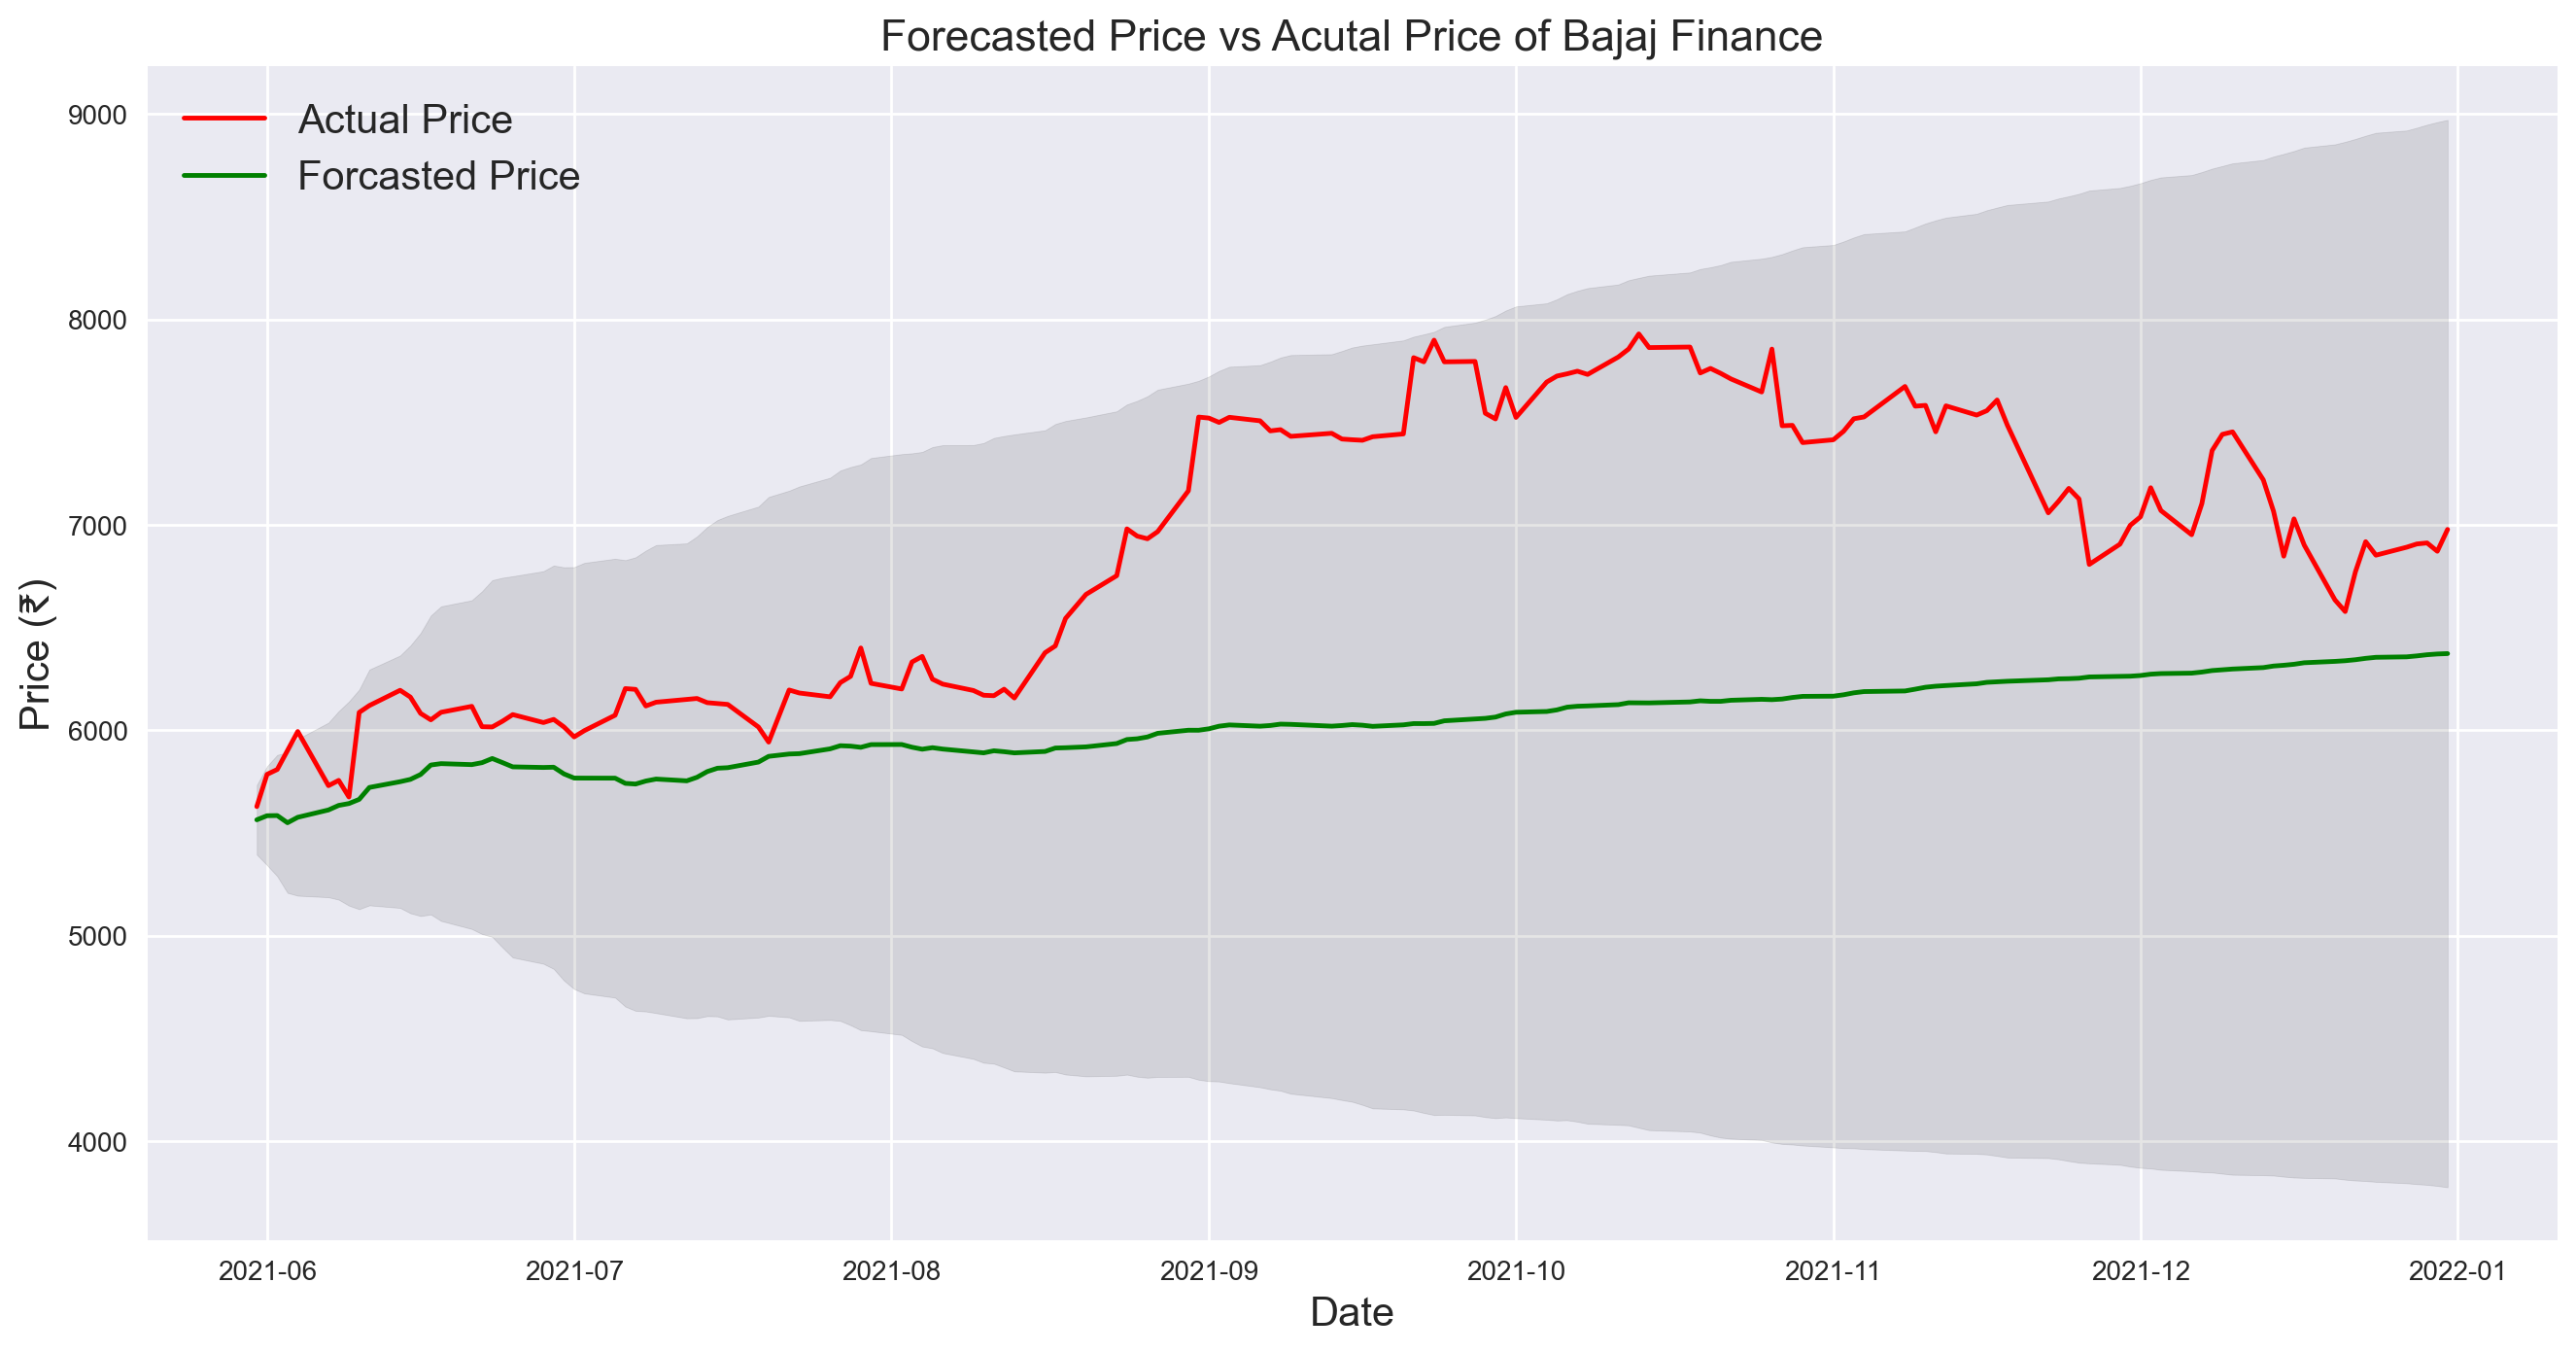

In [244]:
plt.figure(figsize=(16,8),dpi=200)

plt.plot(test[:step],label="Actual Price",color="red")
plt.plot(fc,label="Forcasted Price",color="green")
plt.fill_between(lower.index,lower,upper,color="k",alpha=0.1)
plt.title("Forecasted Price vs Acutal Price of Bajaj Finance",fontsize=16)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Price (₹)",fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

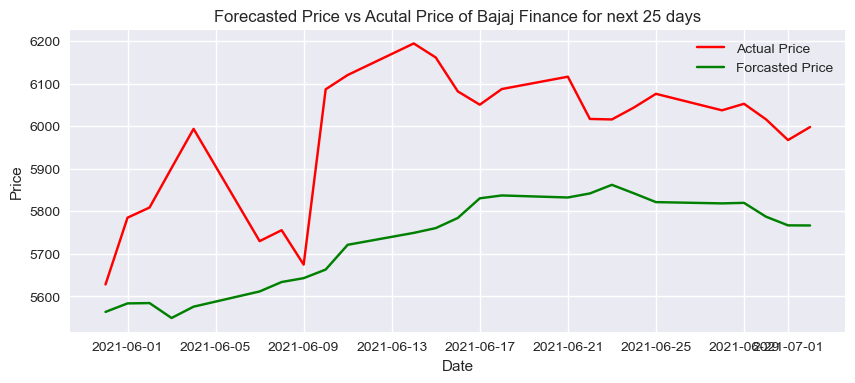

In [236]:
plt.figure(figsize=(10,4),dpi=100)
plt.plot(test[:25],label="Actual Price",color="red")
plt.plot(fc[:25],label="Forcasted Price",color="green")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper right", fontsize=10)
plt.title("Forecasted Price vs Acutal Price of Bajaj Finance for next 25 days")
plt.show()



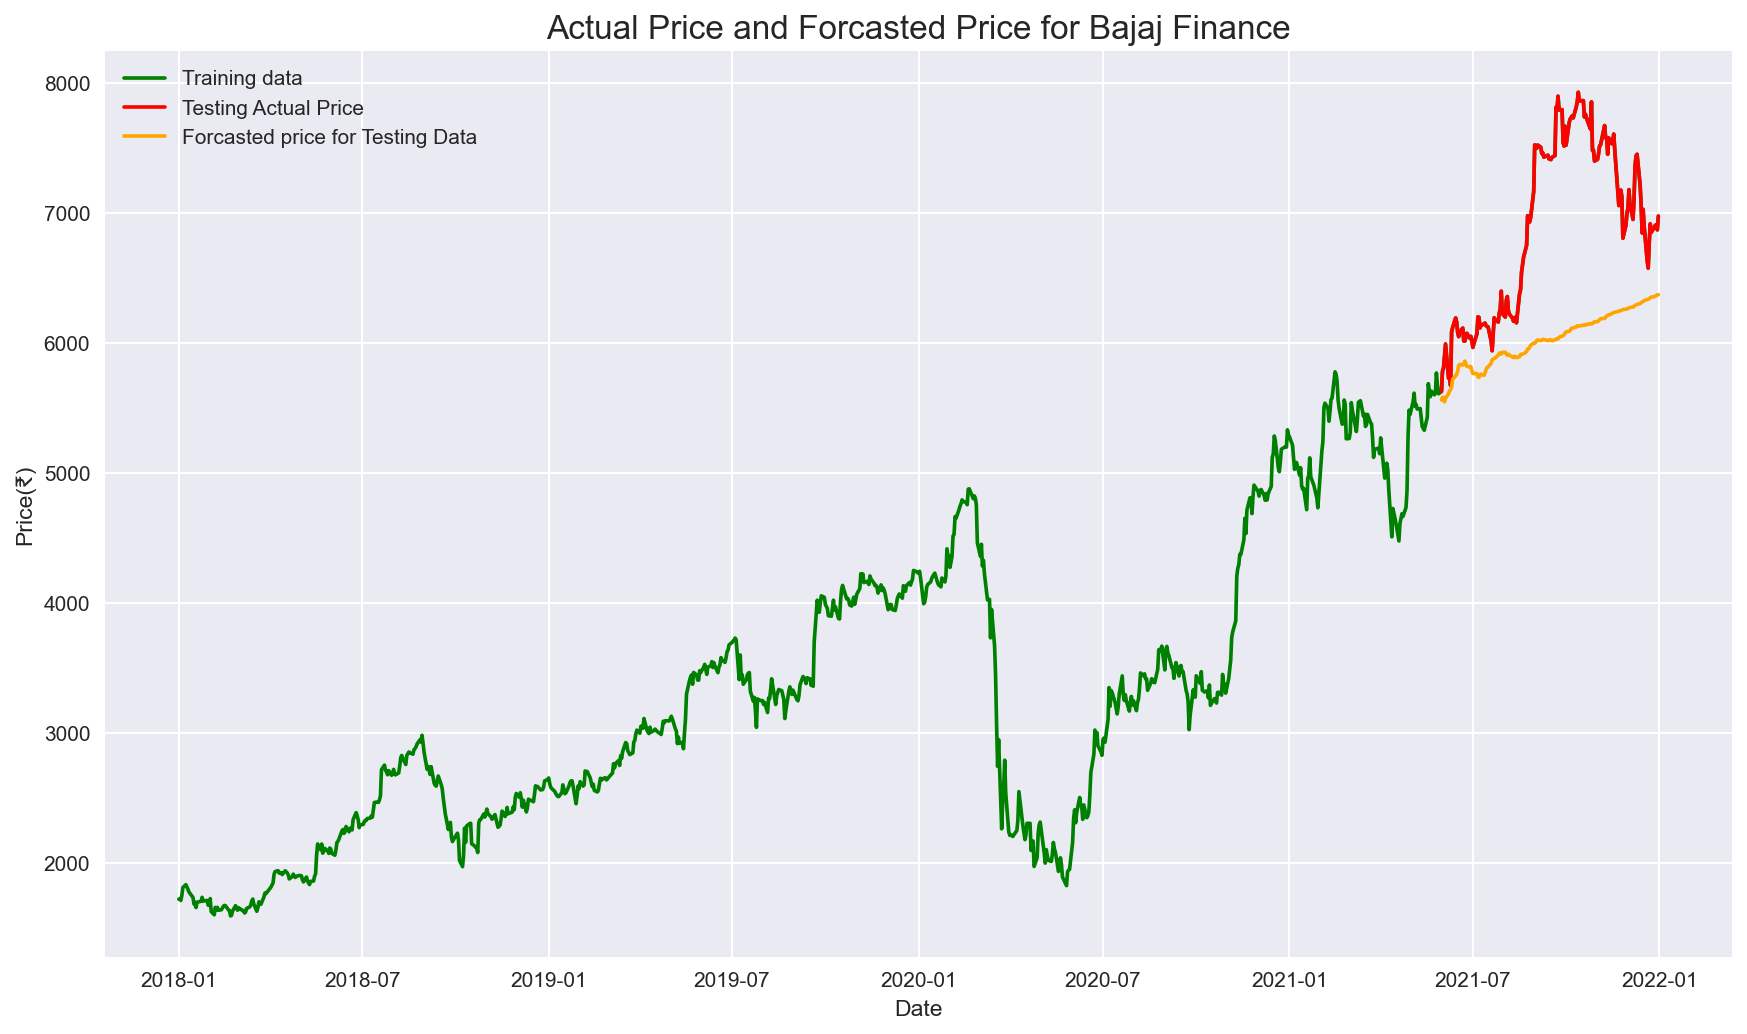

In [250]:
plt.figure(figsize=(14,8),dpi=150)
plt.plot(df,color="green",label="Training data")
plt.plot(test,color="red",label="Testing Actual Price")
plt.plot(fc,color="orange",label="Forcasted price for Testing Data")
plt.xlabel("Date")
plt.ylabel("Price(₹)")
plt.title("Actual Price and Forcasted Price for Bajaj Finance",fontsize=16)
plt.legend(loc="upper left", fontsize=10)
;
plt.show()

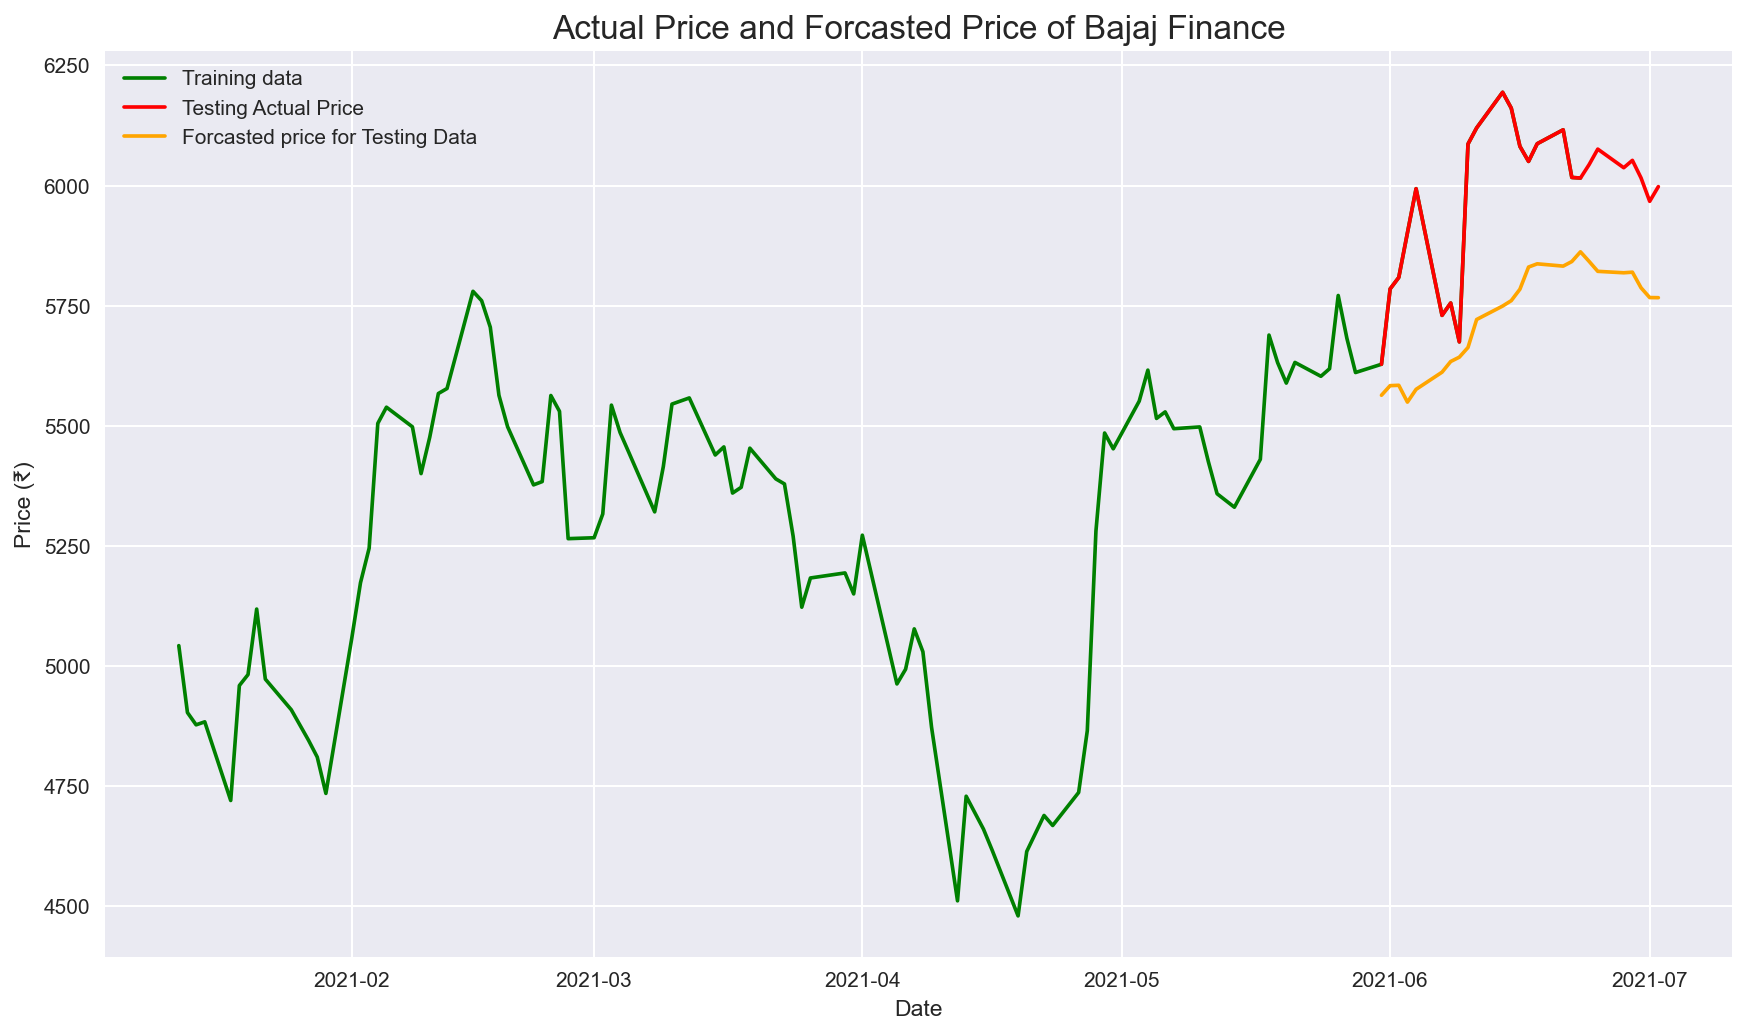

In [251]:
plt.figure(figsize=(14,8),dpi=150)
plt.plot(df[750:860],color="green",label="Training data")
plt.plot(test[:25],color="red",label="Testing Actual Price")
plt.plot(fc[:25],color="orange",label="Forcasted price for Testing Data")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.title("Actual Price and Forcasted Price of Bajaj Finance",fontsize=16)
plt.legend(loc="upper left", fontsize=10)
;
plt.show()

In [232]:
start=1
end=len(df)
pred=result.predict(start=start,end=end,typ="levels")
print(pred)

0      1730.312943
1      1729.260065
2      1719.764515
3      1758.727393
4      1819.638851
          ...     
986    6361.595856
987    6367.273383
988    6370.914494
989    6372.840011
990    6377.583097
Length: 991, dtype: float64


In [233]:
#### Calculate RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
rmse_test=math.sqrt(mean_squared_error(test,fc))
print(rmse_test)

1017.0391259830172


In [234]:
from sklearn.metrics import mean_absolute_error
MAPE_test=mean_absolute_error(test,fc)

print(MAPE_test)

855.3817923463474
